In [37]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
digits = datasets.load_digits()

In [59]:
x = pd.DataFrame(digits.data)

In [541]:
y = pd.DataFrame(digits.target)

## 2. Make a train -test split with 20% of the data set aside for testing.

In [542]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 110, test_size = 0.20)

In [538]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

In [543]:
log_m = LogisticRegression()

In [544]:
log_m.fit(x_train, y_train)

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [545]:
y_pred = log_m.predict(x_test)

In [546]:
print('The Accuracy will be:', accuracy_score(y_test, y_pred))

The Accuracy will be: 0.9666666666666667


In [547]:
print(r2_score(y_test, y_pred))

0.9398137329248254


# perform a PCA transformation 

In [548]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [558]:
lda = LinearDiscriminantAnalysis(n_components=7)
# he number of components in the projected subspace is 30 ro get 95% expalianed variance

In [565]:
lda_data = lda.fit_transform(x,y)

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [562]:
 lda_data_df = pd.DataFrame(lda_data)

In [566]:
lda_data_df

,0,1,2,3,4,5,6
0,-2.014632,-5.623486,-0.186594,-2.800109,0.443373,0.579755,-0.109349
1,0.220967,3.592400,2.149017,-0.114046,-2.054971,-2.222544,-0.123115
2,2.234855,2.709504,4.269928,-2.147419,1.737674,-1.281434,2.512566
3,2.760965,-0.624427,0.158751,1.247578,-0.066359,0.805282,-2.963266
4,-5.845449,1.754015,0.400295,-1.376300,-0.312251,-0.461142,-1.367118
...,...,...,...,...,...,...,...
1792,1.213858,-2.473313,-1.984814,-1.718768,-2.833563,0.014869,0.445814
1793,-2.456013,-4.420402,0.637759,-1.306113,1.985565,-0.233411,0.648579
1794,-1.046972,1.483677,3.041703,-0.604862,-2.812749,2.039136,1.549134
1795,0.407873,-1.991673,-0.365836,-2.168076,-2.263624,0.142661,0.916595


In [561]:
lda.explained_variance_ratio_.round(3)

array([0.289, 0.183, 0.17 , 0.117, 0.083, 0.066, 0.043])

In [379]:
# import numpy as np
# pca.n_components = 64
# pca_data = pca.fit_transform(x)
# percentage_variance_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
# cum_var_explained = np.cumsum(percentage_variance_explained)

# # Plot the PCA spectrum
# plt.figure(1, figsize=(6,4))
# plt.clf()
# plt.plot(cum_var_explained, linewidth = 2.5)
# plt.grid()


In [555]:
cum = np.cumsum(lda.explained_variance_ratio_)

In [556]:
cum

array([0.28912041, 0.47174829, 0.64137175, 0.75807724, 0.84108978,
       0.90674662, 0.94984789, 0.9791736 , 1.        ])

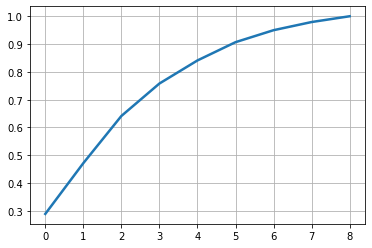

In [557]:
plt.figure(1, figsize=(6,4))
plt.clf()
plt.plot(cum, linewidth = 2.5)
plt.grid()


In [492]:
x_train, x_test, y_train, y_test = train_test_split(pca_data_df, y, random_state = 110, test_size = 0.20)

In [493]:
log_new = LogisticRegression()

In [494]:
log_new.fit(x_train, y_train)

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [507]:
y_predicted = log_new.predict(x_test)

In [508]:
print('The accuracy after PCA is:', accuracy_score(y_test, y_predicted))

The accuracy after PCA is: 0.9722222222222222


In [509]:
print('The R2 after PCA is:', r2_score(y_test, y_predicted))

The R2 after PCA is: 0.9438039826756657


C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


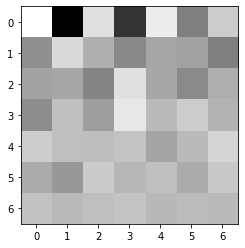

In [510]:
plt.imshow(pca_data_df.iloc[1].as_matrix().reshape(7,7), cmap='gray')

In [534]:
print(confusion_matrix(y_test, y_predicted))

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  1  0  0  1  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  1  0]
 [ 0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  1  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  1  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  2  2 34]]
